In [1]:
! pip install segyio obspy

In [35]:
import segyio
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, butter, filtfilt
from scipy.ndimage import sobel

file45 = "/content/05-29-line-45-second-vels-stack.segy"

In [36]:
with segyio.open(file45, 'r', ignore_geometry=True) as f:
  f.mmap()
  data = np.stack([f.trace[i] for i in range(len(f.trace))])
  times = f.samples

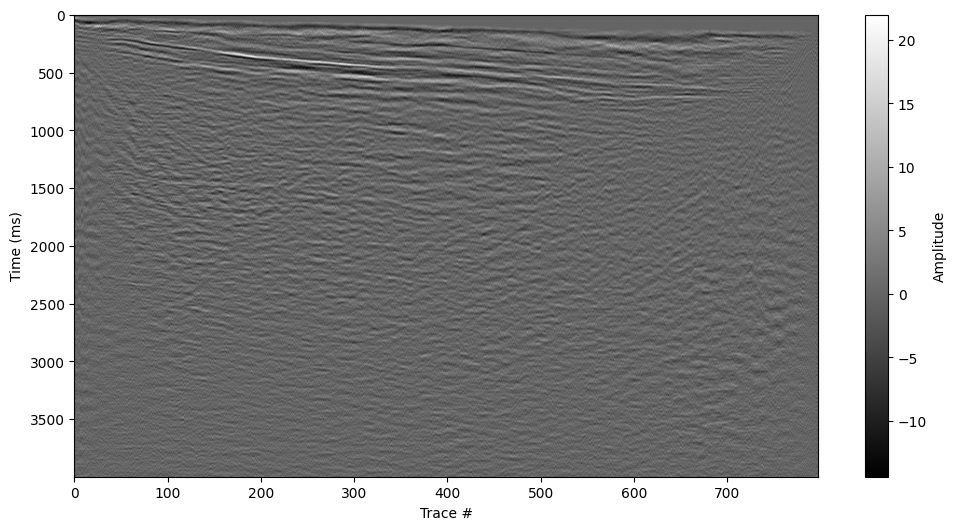

In [37]:
plt.figure(figsize=(12, 6))
plt.imshow(data.T, aspect='auto', cmap='gray', extent=[0, data.shape[0], times[-1], times[0]])
plt.xlabel("Trace #")
plt.ylabel("Time (ms)")
plt.colorbar(label="Amplitude")

In [38]:
envelope = np.abs(hilbert(data, axis=1))

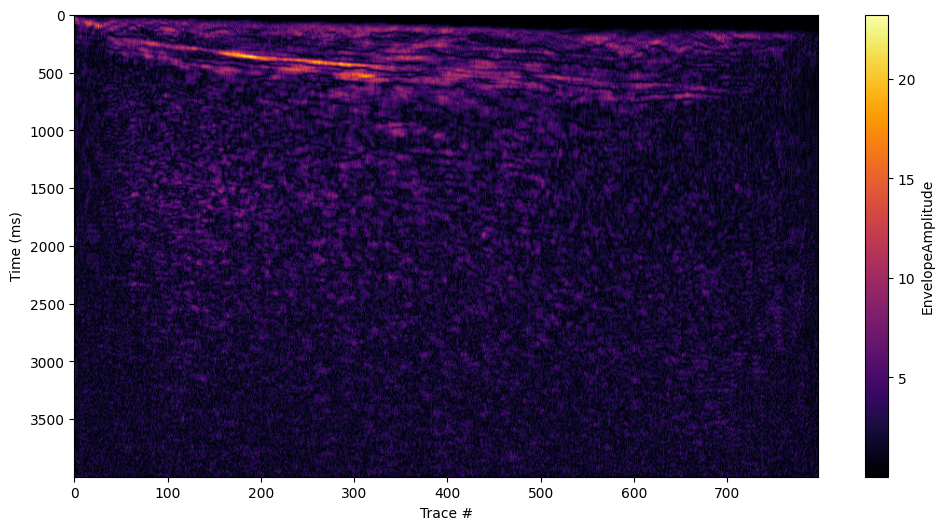

In [47]:
plt.figure(figsize=(12,6))
plt.imshow(envelope.T, aspect='auto', cmap='inferno', extent=[0, data.shape[0], times[-1], times[0]])
plt.xlabel("Trace #")
plt.ylabel("Time (ms)")
plt.colorbar(label="EnvelopeAmplitude")

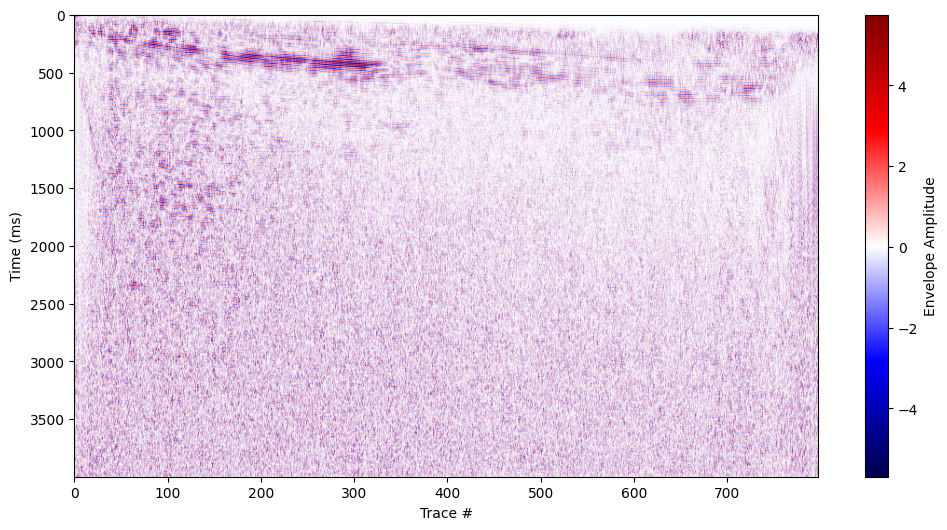

In [43]:
def bandpass(data, fs, lowcut, highcut, order=4):
  nyq = 0.5 *fs
  low = lowcut / nyq
  high = highcut / nyq
  b, a = butter(order, [low, high], btype='band')
  return filtfilt(b, a, data, axis=1)

dt_ms = times[1] - times[0]
fs = 1000 / dt_ms

filtered = bandpass(data, fs, lowcut=30, highcut=80)

plt.figure(figsize=(12,6))
plt.imshow(filtered.T, aspect='auto', cmap='seismic', extent=[0, data.shape[0], times[-1], times[0]])
plt.xlabel("Trace #")
plt.ylabel("Time (ms)")
plt.colorbar(label="Envelope Amplitude")

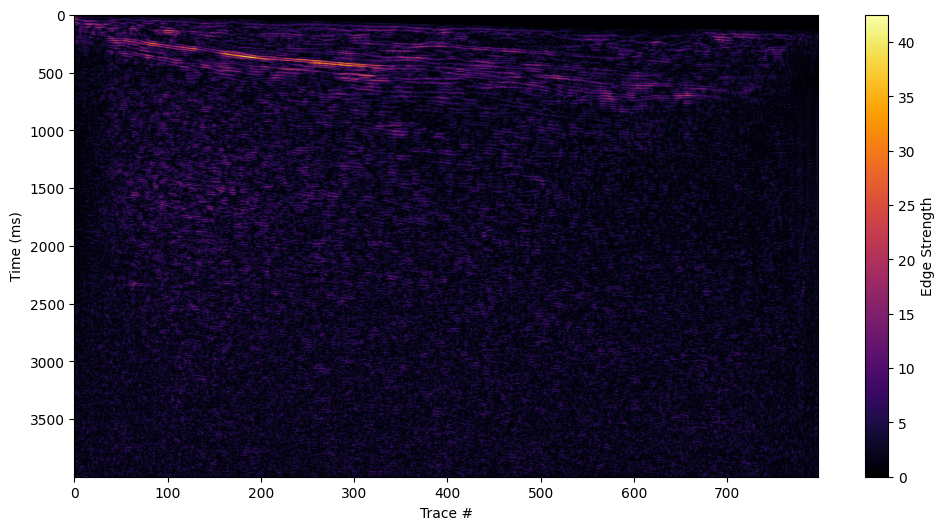

In [48]:
edges = sobel(data, axis =1)

plt.figure(figsize=(12,6))
plt.imshow(np.abs(edges).T, aspect='auto', cmap='inferno', extent=[0, data.shape[0], times[-1], times[0]])
plt.xlabel("Trace #")
plt.ylabel("Time (ms)")
plt.colorbar(label="Edge Strength")

In [49]:
file43 = "/content/05-29-line-43-first-vels-stack.segy"

In [53]:
with segyio.open(file43, 'r', ignore_geometry=True) as f:
  f.mmap()
  data43 = np.stack([f.trace[i] for i in range(len(f.trace))])
  times43 = f.samples

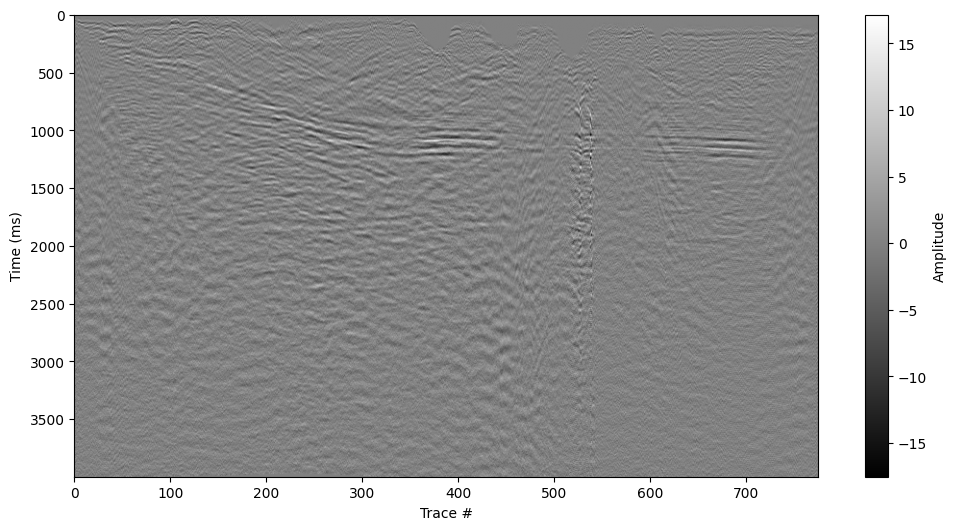

In [54]:
plt.figure(figsize=(12, 6))
plt.imshow(data43.T, aspect='auto', cmap='gray', extent=[0, data43.shape[0], times43[-1], times43[0]])
plt.xlabel("Trace #")
plt.ylabel("Time (ms)")
plt.colorbar(label="Amplitude")

In [56]:
envelope43 = np.abs(hilbert(data43, axis=1))

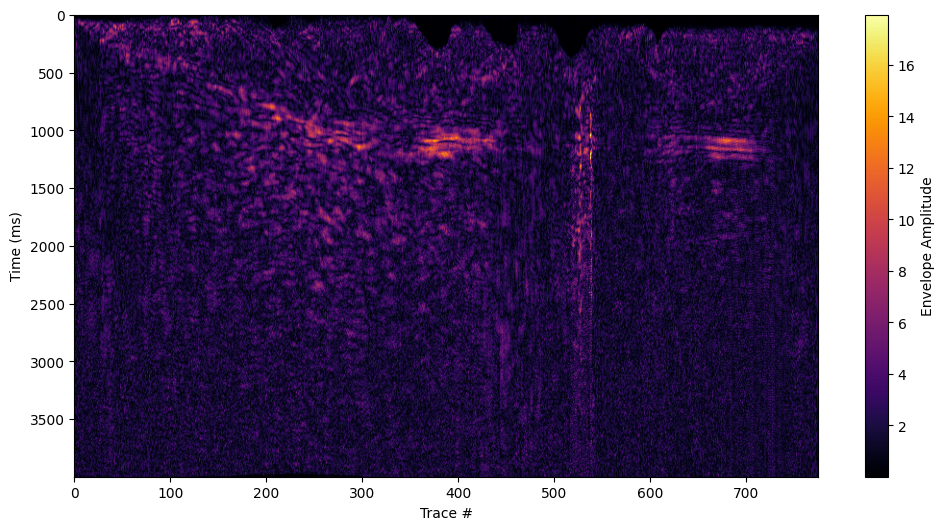

In [61]:
plt.figure(figsize=(12,6))
plt.imshow(envelope43.T, aspect='auto', cmap='inferno', extent=[0, data43.shape[0], times43[-1], times43[0]])
plt.xlabel("Trace #")
plt.ylabel("Time (ms)")
plt.colorbar(label="Envelope Amplitude")

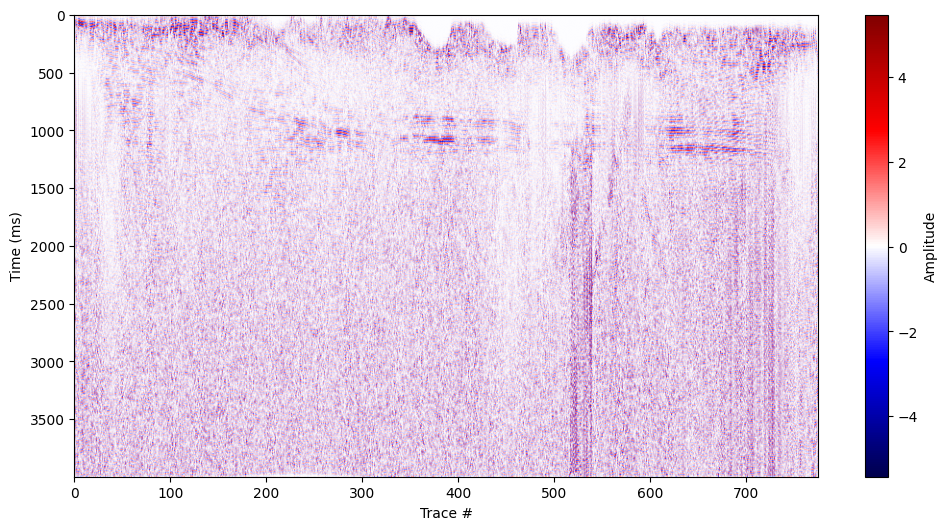

In [59]:
dt_ms43 = times43[1] - times43[0]
fs = 1000 / dt_ms43

filtered43 = bandpass(data43, fs, lowcut=30, highcut=80)

plt.figure(figsize=(12,6))
plt.imshow(filtered43.T, aspect='auto', cmap='seismic', extent=[0, data43.shape[0], times43[-1], times43[0]])
plt.xlabel("Trace #")
plt.ylabel("Time (ms)")
plt.colorbar(label="Amplitude")

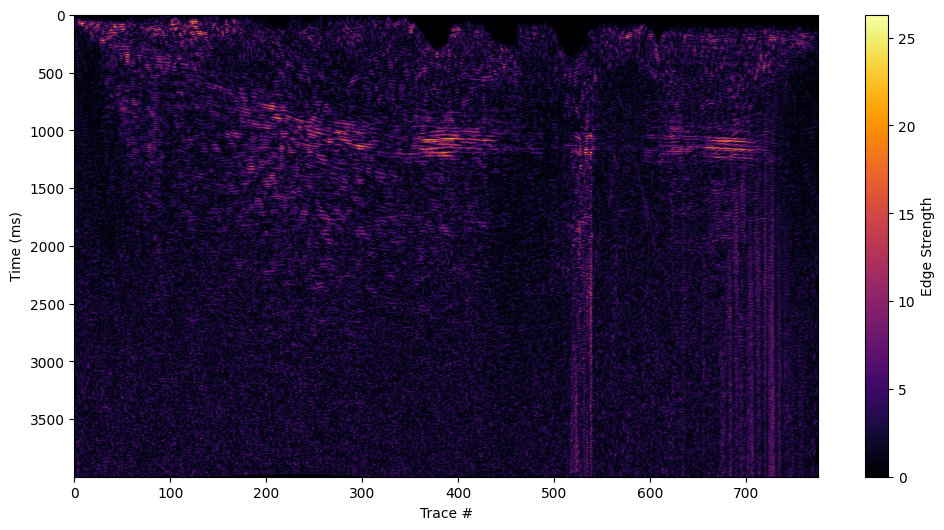

In [60]:
edges43 = sobel(data43, axis =1)

plt.figure(figsize=(12,6))
plt.imshow(np.abs(edges43).T, aspect='auto', cmap='inferno', extent=[0, data43.shape[0], times43[-1], times43[0]])
plt.xlabel("Trace #")
plt.ylabel("Time (ms)")
plt.colorbar(label="Edge Strength")

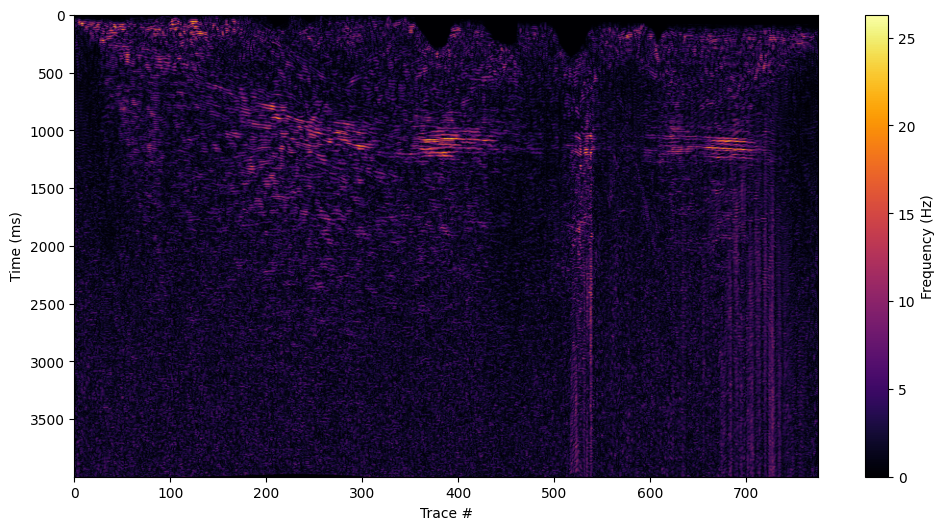

In [66]:
analytic = hilbert(data43, axis=1)
inst_phase = np.unwrap(np.angle(analytic), axis=1)
inst_freq = np.diff(inst_phase, axis=1) / (2.0 * np.pi * (dt_ms43 / 1000))
inst_freq = np.pad(inst_freq, ((0, 0), (0,1)), mode = 'edge')

plt.figure(figsize=(12,6))
plt.imshow(np.abs(edges43).T, aspect='auto', cmap='inferno', extent=[0, data43.shape[0], times43[-1], times43[0]])
plt.xlabel("Trace #")
plt.ylabel("Time (ms)")
plt.colorbar(label="Frequency (Hz)")

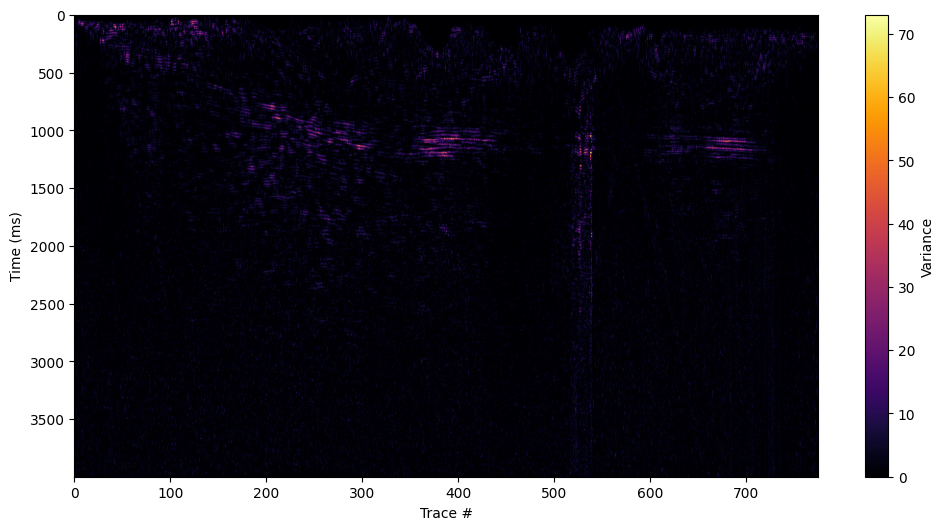

In [67]:
def trace_variance(data43, window=5):

    padded = np.pad(data43, ((0, 0), (window, window)), mode='edge')

    var = np.zeros_like(data43)

    for i in range(data43.shape[1]):

        var[:, i] = np.var(padded[:, i:i + 2*window+1], axis=1)

    return var



var_attr = trace_variance(data43, window=5)



plt.figure(figsize=(12, 6))

plt.imshow(var_attr.T, aspect='auto', cmap='inferno', extent=[0, data43.shape[0], times43[-1], times43[0]])

plt.xlabel("Trace #")

plt.ylabel("Time (ms)")

plt.colorbar(label="Variance")

plt.show()